<a href="https://colab.research.google.com/github/ribeirolucas962/biblioteca_pandas/blob/main/CRM_ANALISE_DE_VENDAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalação de bibliotecas

In [86]:
!pip install xlrd -q
!pip install openpyxl -q
!pip install lifetimes -q
!pip install missingno

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import minmax_scale
from lifetimes import BetaGeoBetaBinomFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
import warnings
warnings.filterwarnings("ignore")

#Carregando a base de dados

In [88]:
df =  pd.read_excel('/content/CRM.xlsx')

#Fazendo cópia dos dados

In [89]:
df = df.copy()

#Lendro as primeiras entradas

In [90]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


#Fazendo renomeação de nome de colulas

In [91]:
df.rename(columns={'Invoice': 'Numero_Fatura'}, inplace=True)

In [92]:
df.head()

,Numero_Fatura,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [93]:
df.rename(columns={'StockCode	': 'Codigo_Produto','Description': 'Nome_Produto','Quantity': 'Quantidade_Produto','InvoiceDate': 'Data_Fatura','Price': 'Preco_Produto','CustomerID':'Numero_Cliente','Country':'Pais'}, inplace=True)

In [94]:
df.head()

,Numero_Fatura,StockCode,Nome_Produto,Quantidade_Produto,Data_Fatura,Preco_Produto,Customer ID,Pais
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


#Visualizando o tamanho da base de dados


In [95]:
df.shape

(525461, 8)

#Atributos estatísticos (variáveis numéricas) usando metado describe

In [96]:
df.describe()

,Quantidade_Produto,Preco_Produto,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [97]:
df.describe(include = 'O')

,Numero_Fatura,StockCode,Nome_Produto,Pais
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [98]:
df.columns

Index(['Numero_Fatura', 'StockCode', 'Nome_Produto', 'Quantidade_Produto',
       'Data_Fatura', 'Preco_Produto', 'Customer ID', 'Pais'],
      dtype='object')

#criando a função check_df

In [99]:
def check_df(dataframe):
  print("#################### Shape ####################")
  print(dataframe.shape)
  print("#################### Types ####################")
  print(dataframe.dtypes)
  print("#################### Head ####################")
  print(dataframe.head)
  print("#################### Tail ####################")
  print(dataframe.tail)
  print("#################### NA ####################")
  print(dataframe.isnull().sum())
  print("#################### Quantiles ####################")
  print(dataframe.quantile ([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


#Testando a função check_df

In [100]:
check_df(df)

#################### Shape ####################
(525461, 8)
#################### Types ####################
Numero_Fatura                 object
StockCode                     object
Nome_Produto                  object
Quantidade_Produto             int64
Data_Fatura           datetime64[ns]
Preco_Produto                float64
Customer ID                  float64
Pais                          object
dtype: object
#################### Head ####################
<bound method NDFrame.head of        Numero_Fatura StockCode                         Nome_Produto  \
0             489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS   
1             489434    79323P                   PINK CHERRY LIGHTS   
2             489434    79323W                  WHITE CHERRY LIGHTS   
3             489434     22041         RECORD FRAME 7" SINGLE SIZE    
4             489434     21232       STRAWBERRY CERAMIC TRINKET BOX   
...              ...       ...                                  ...   
525456  

#Valores estatísticos para os valores 0, 0.05, 0.50, 0.95, 0.99 e 1

In [101]:
df.describe([0.01,0.25,0.50,0.75,0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
Quantidade_Produto,525461.0,10.337667,107.424110,-9600.00,-3.00,1.00,3.0,10.00,120.00,19152.00
Preco_Produto,525461.0,4.688834,146.126914,-53594.36,0.21,1.25,2.1,4.21,19.95,25111.09
Customer ID,417534.0,15360.645478,1680.811316,12346.00,12435.00,13983.00,15311.0,16799.00,18196.00,18287.00


#Visualizando se há correlação específica entre os valores ausentes

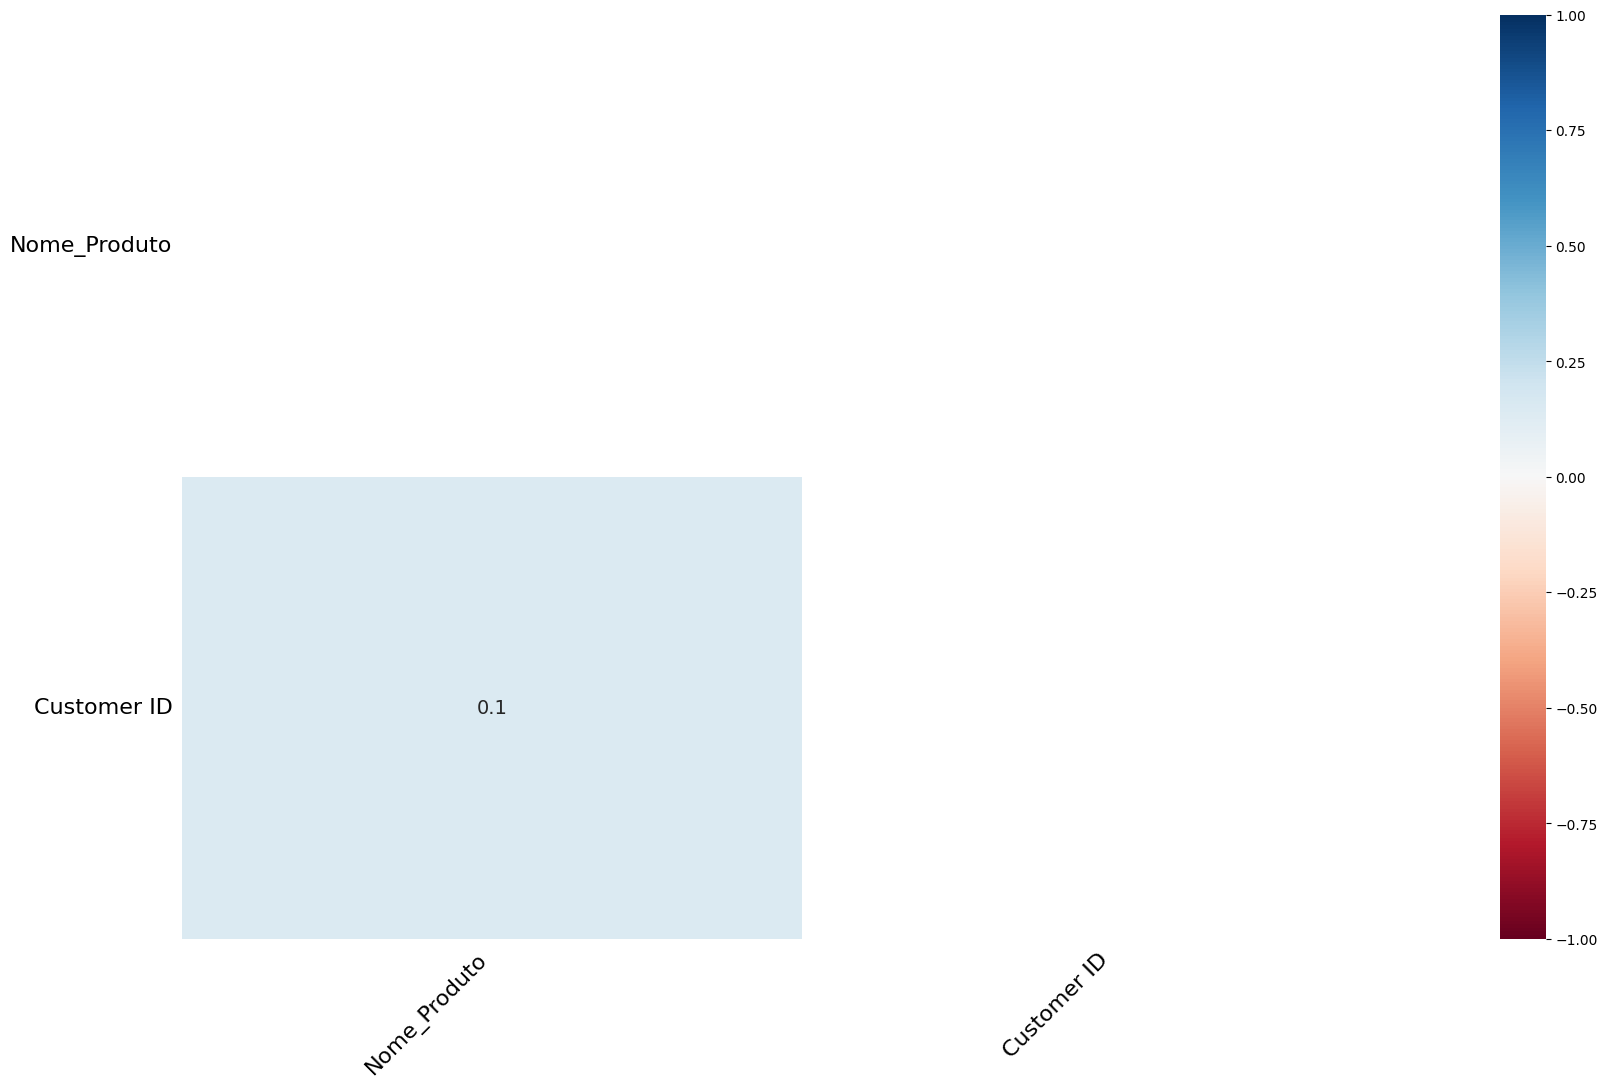

In [102]:
msno.heatmap(df);

#boxplot para Quantidade_Produto

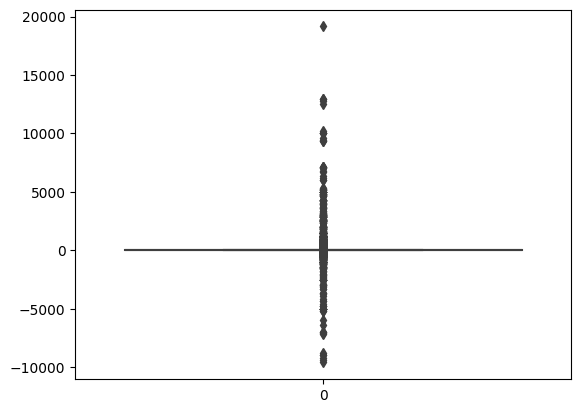

In [103]:
sns.boxplot(df['Quantidade_Produto']);

#Boxplot para Price

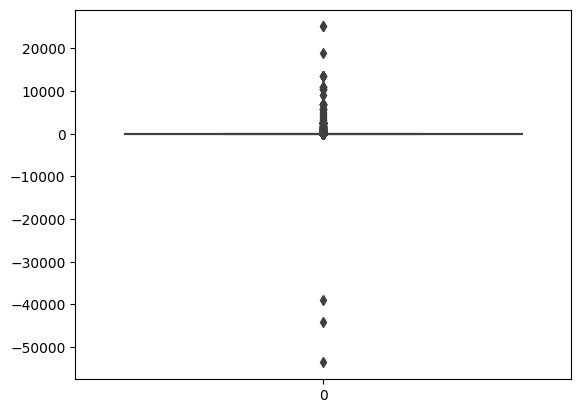

In [104]:
sns.boxplot(df['Preco_Produto']);

#Função para retornar limites dos valores ausentes

In [105]:
def outlier_thresholds(dataframe, variable):
  quartile1 = dataframe[variable].quantile(0.01)
  quartile3 = dataframe[variable].quantile(0.99)
  interquantile_range = quartile3 - quartile1
  up_limit = quartile3 + 1.5 * interquantile_range
  low_limit = quartile1 - 1.5 * interquantile_range
  return low_limit, up_limit

#Função para fazer o replace já com exclusão dos limites

In [106]:
def replace_with_thresholds(dataframe, variable):
  low_limit, up_limit = outlier_thresholds(dataframe, variable)
  dataframe.loc[(dataframe[variable]> up_limit), variable]= up_limit

In [107]:
df.head()

,Numero_Fatura,StockCode,Nome_Produto,Quantidade_Produto,Data_Fatura,Preco_Produto,Customer ID,Pais
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Fazendo o replace

In [108]:
replace_with_thresholds(df,'Quantidade_Produto')
replace_with_thresholds(df,'Preco_Produto')

#Visualizando as variáveis, agora sem outliers

In [109]:
df.describe([0.01,0.25,0.50,0.75,0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
Quantidade_Produto,525461.0,8.685688,60.954547,-9600.00,-3.00,1.00,3.0,10.00,120.00,304.50
Preco_Produto,525461.0,3.264510,109.822785,-53594.36,0.21,1.25,2.1,4.21,19.95,49.56
Customer ID,417534.0,15360.645478,1680.811316,12346.00,12435.00,13983.00,15311.0,16799.00,18196.00,18287.00


#Função para preparar dados

In [110]:
def crm_data_prep(dataframe):
    dataframe.dropna(axis=0, inplace=True)
    dataframe = dataframe[~dataframe["Numero_Fatura"].str.contains("C", na=False)]
    dataframe = dataframe[dataframe["Quantidade_Produto"] > 0]
    dataframe["TotalPrice"] = dataframe["Quantidade_Produto"] * dataframe["Preco_Produto"]
    return dataframe


#Checando os dados

In [111]:
df = crm_data_prep(df)
check_df(df)

#################### Shape ####################
(407695, 9)
#################### Types ####################
Numero_Fatura                 object
StockCode                     object
Nome_Produto                  object
Quantidade_Produto           float64
Data_Fatura           datetime64[ns]
Preco_Produto                float64
Customer ID                  float64
Pais                          object
TotalPrice                   float64
dtype: object
#################### Head ####################
<bound method NDFrame.head of        Numero_Fatura StockCode                         Nome_Produto  \
0             489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS   
1             489434    79323P                   PINK CHERRY LIGHTS   
2             489434    79323W                  WHITE CHERRY LIGHTS   
3             489434     22041         RECORD FRAME 7" SINGLE SIZE    
4             489434     21232       STRAWBERRY CERAMIC TRINKET BOX   
...              ...       ...            

#Variáveis após serem removidos os limites dos outliers


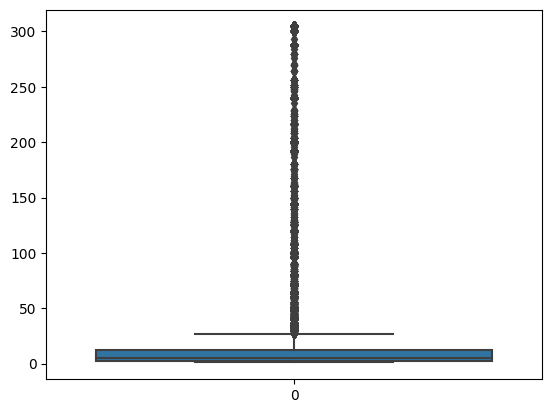

In [112]:
sns.boxplot(df['Quantidade_Produto']);

<Axes: >

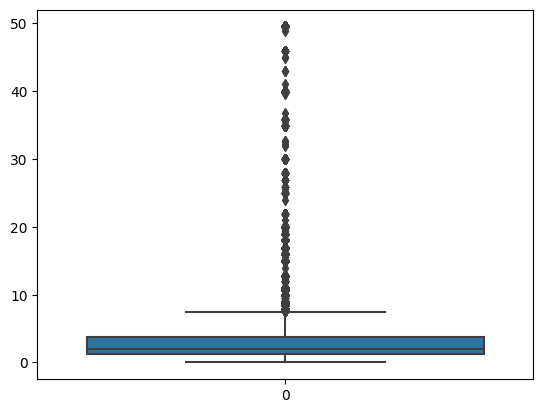

In [113]:
sns.boxplot(df['Preco_Produto'])

#Data da última transação

In [114]:
df['Data_Fatura'].max()

Timestamp('2010-12-09 20:01:00')

#Data da primeira transação

In [115]:
df['Data_Fatura'].min()

Timestamp('2009-12-01 07:45:00')

In [116]:
df.head()

,Numero_Fatura,StockCode,Nome_Produto,Quantidade_Produto,Data_Fatura,Preco_Produto,Customer ID,Pais,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


#Criando a função RFM


In [130]:
def create_rfm(dataframe):
    # Métricas do RFM


    today_date = dt.datetime(2010, 12, 11)

    rfm = dataframe.groupby('Customer ID').agg({'Data_Fatura': lambda date: (today_date - date.max()).days,
                                                'Numero_Fatura': lambda num: num.nunique(),
                                                "TotalPrice": lambda price: price.sum()})

    rfm.columns = ['recency', 'frequency', "monetary"]

    rfm = rfm[(rfm['monetary'] > 0)]


    # Score do RFM
    rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
    rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])



    # Nomeação de segmentos
    rfm['rfm_segment'] = rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str)

    seg_map = {
        r'[1-2][1-2]': 'hibernating',
        r'[1-2][3-4]': 'at_risk',
        r'[1-2]5': 'cant_loose',
        r'3[1-2]': 'about_to_sleep',
        r'33': 'need_attention',
        r'[3-4][4-5]': 'loyal_customers',
        r'41': 'promising',
        r'51': 'new_customers',
        r'[4-5][2-3]': 'potential_loyalists',
        r'5[4-5]': 'champions'
    }

    rfm['rfm_segment'] = rfm['rfm_segment'].replace(seg_map, regex=True)
    rfm = rfm[["recency", "frequency", "monetary", "rfm_segment"]]
    return rfm


In [133]:
rfm = create_rfm(df)
df.tail(10)

,Numero_Fatura,StockCode,Nome_Produto,Quantidade_Produto,Data_Fatura,Preco_Produto,Customer ID,Pais,TotalPrice
525451,538171,22748,POPPY'S PLAYHOUSE KITCHEN,2.0,2010-12-09 20:01:00,2.10,17530.0,United Kingdom,4.20
525452,538171,22745,POPPY'S PLAYHOUSE BEDROOM,2.0,2010-12-09 20:01:00,2.10,17530.0,United Kingdom,4.20
525453,538171,22558,CLOTHES PEGS RETROSPOT PACK 24,4.0,2010-12-09 20:01:00,1.49,17530.0,United Kingdom,5.96
525454,538171,21671,RED SPOT CERAMIC DRAWER KNOB,6.0,2010-12-09 20:01:00,1.25,17530.0,United Kingdom,7.50
525455,538171,20971,PINK BLUE FELT CRAFT TRINKET BOX,2.0,2010-12-09 20:01:00,1.25,17530.0,United Kingdom,2.50
525456,538171,22271,FELTCRAFT DOLL ROSIE,2.0,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1.0,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1.0,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2.0,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50
525460,538171,21931,JUMBO STORAGE BAG SUKI,2.0,2010-12-09 20:01:00,1.95,17530.0,United Kingdom,3.90
